In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_excel('car_fuel_efficiency.xlsx')

In [5]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]


np.float64(-0.012062219273507892)

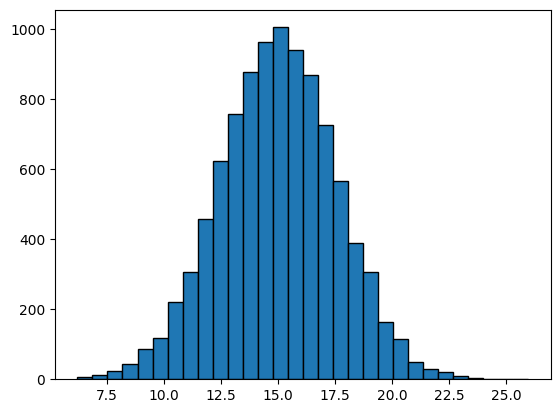

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['fuel_efficiency_mpg'], bins=30, edgecolor='black')
df['fuel_efficiency_mpg'].skew()


In [9]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [10]:
df['horsepower'].median()

np.float64(149.0)

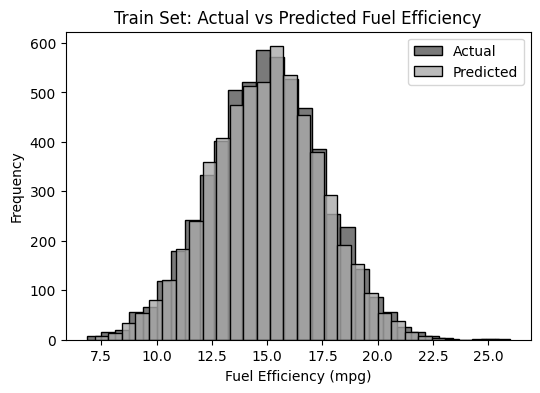

Train RMSE: 0.5202614265099075
Validation RMSE: 0.5173782638841186
Test RMSE: 0.5165003926284614
Train R^2: 0.958629512777638
Validation R^2: 0.9618977903220274
Test R^2: 0.9556408945623107


In [17]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Set seed for reproducibility

np.random.seed(42)

# Define filtered columns

df_filtered = df.copy()

# Shuffle and split dataset (60/20/20)

n = len(df_filtered)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_filtered.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

# Prepare target variable
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

# Remove target column from features
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Linear regression function

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    # Normal equation
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]  # bias, weights

# Prepare features

base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

def prepare_X(df):
    df_num = df[base].fillna(0)
    X = df_num.values
    return X

X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
X_test = prepare_X(df_test)

# Train model
w_0, w = train_linear_regression(X_train, y_train)

# Make predictions

y_train_pred = w_0 + X_train.dot(w)
y_val_pred = w_0 + X_val.dot(w)
y_test_pred = w_0 + X_test.dot(w)

# Visualize predictions vs actual (train set)
plt.figure(figsize=(6, 4))
sns.histplot(y_train, label='Actual', color='#222222', alpha=0.6, bins=30)
sns.histplot(y_train_pred, label='Predicted', color='#aaaaaa', alpha=0.8, bins=30)
plt.legend()
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Frequency')
plt.title('Train Set: Actual vs Predicted Fuel Efficiency')
plt.show()

# Evaluate model manually
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Train RMSE:", train_rmse)
print("Validation RMSE:", val_rmse)
print("Test RMSE:", test_rmse)

print("Train R^2:", r2_score(y_train, y_train_pred))
print("Validation R^2:", r2_score(y_val, y_val_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Prepare base features
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

def prepare_X_fill(df, fill_option='zero', train_mean=None):
    """
    Prepares the feature matrix X with missing value handling.
    fill_option: 'zero' or 'mean'
    train_mean: mean values from training set (needed if fill_option='mean')
    """
    df_num = df[base].copy()
    
    if fill_option == 'zero':
        df_num = df_num.fillna(0)
    elif fill_option == 'mean':
        if train_mean is None:
            raise ValueError("train_mean must be provided for fill_option='mean'")
        df_num = df_num.fillna(train_mean)
    
    return df_num.values
 # Compute training mean for 'mean' option
train_mean_values = df_train[base].mean()

#Prepare feature matrices
# Option 1: Fill missing with 0
X_train_0 = prepare_X_fill(df_train, fill_option='zero')
X_val_0   = prepare_X_fill(df_val, fill_option='zero')

# Option 2: Fill missing with training mean
X_train_mean = prepare_X_fill(df_train, fill_option='mean', train_mean=train_mean_values)
X_val_mean   = prepare_X_fill(df_val, fill_option='mean', train_mean=train_mean_values)

#  Linear regression function
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w[0], w[1:]

#  Train models
# Fill with 0
w0_0, w_0 = train_linear_regression(X_train_0, y_train)
y_val_pred_0 = w0_0 + X_val_0.dot(w_0)
rmse_0 = round(np.sqrt(mean_squared_error(y_val, y_val_pred_0)), 2)

# Fill with mean
w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
y_val_pred_mean = w0_mean + X_val_mean.dot(w_mean)
rmse_mean = round(np.sqrt(mean_squared_error(y_val, y_val_pred_mean)), 2)

# Print RMSEs
print("RMSE (fill with 0):", rmse_0)
print("RMSE (fill with mean):", rmse_mean)

#  Determine which option is better
if rmse_0 < rmse_mean:
    print("Better option: Fill with 0")
elif rmse_mean < rmse_0:
    print("Better option: Fill with mean")
else:
    print("Both options are equally good")



RMSE (fill with 0): 0.52
RMSE (fill with mean): 0.46
Better option: Fill with mean


In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Fill missing values with 0 and prepare features
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

def prepare_X(df):
    df_num = df[base].fillna(0)
    return df_num.values

X_train = prepare_X(df_train)
X_val   = prepare_X(df_val)

# Regularized linear regression (Ridge)
def train_ridge_regression(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])  # add bias term
    
    # Create identity matrix for regularization
    I = np.eye(X.shape[1])
    I[0,0] = 0  # do NOT regularize bias
    
    # Compute weights with regularization
    w = np.linalg.inv(X.T.dot(X) + r * I).dot(X.T).dot(y)
    return w[0], w[1:]

# Try different r values
r_list = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_dict = {}

for r in r_list:
    w0, w = train_ridge_regression(X_train, y_train, r=r)
    y_val_pred = w0 + X_val.dot(w)
    rmse = round(np.sqrt(mean_squared_error(y_val, y_val_pred)), 2)
    rmse_dict[r] = rmse

# Print RMSEs for all r
for r, rmse in rmse_dict.items():
    print(f"r = {r}: RMSE = {rmse}")

# Select the best r
min_rmse = min(rmse_dict.values())
best_r = min([r for r, rmse in rmse_dict.items() if rmse == min_rmse])

print("\nBest r:", best_r)
print("Best RMSE:", min_rmse)


r = 0: RMSE = 0.52
r = 0.01: RMSE = 0.52
r = 0.1: RMSE = 0.52
r = 1: RMSE = 0.52
r = 5: RMSE = 0.52
r = 10: RMSE = 0.52
r = 100: RMSE = 0.52

Best r: 0
Best RMSE: 0.52


In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Base features
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

# Function to prepare X with missing values filled with 0
def prepare_X(df):
    return df[base].fillna(0).values

# Function to train linear regression without regularization
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w[0], w[1:]

# List of seeds to test
seeds = list(range(10))
rmse_list = []

# Loop over seeds
for seed in seeds:
    np.random.seed(seed)
    
    # Shuffle and split
    n = len(df)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val   = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test  = df_shuffled.iloc[n_train+n_val:].copy()
    
    # Prepare target
    y_train = df_train['fuel_efficiency_mpg'].values
    y_val   = df_val['fuel_efficiency_mpg'].values
    
    # Remove target from features
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    
    # Prepare feature matrices
    X_train = prepare_X(df_train)
    X_val   = prepare_X(df_val)
    
    # Train linear regression
    w0, w = train_linear_regression(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = w0 + X_val.dot(w)
    
    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    rmse_list.append(rmse)

# Compute standard deviation of RMSEs
rmse_std = round(np.std(rmse_list), 3)
print("Standard deviation of RMSEs:", rmse_std)


Standard deviation of RMSEs: 0.007


In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Base features
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']

# Prepare features with missing values filled with 0
def prepare_X(df):
    return df[base].fillna(0).values

# Regularized linear regression (Ridge)
def train_ridge_regression(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    I = np.eye(X.shape[1])
    I[0,0] = 0  # do not regularize bias
    
    w = np.linalg.inv(X.T.dot(X) + r * I).dot(X.T).dot(y)
    return w[0], w[1:]

# Split dataset with seed 9
np.random.seed(9)
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val   = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test  = df_shuffled.iloc[n_train+n_val:].copy()

# Combine train + validation
df_train_combined = pd.concat([df_train, df_val], ignore_index=True)

# Prepare target
y_train_combined = df_train_combined['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

# Remove target column from features
del df_train_combined['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

# Prepare feature matrices
X_train_combined = prepare_X(df_train_combined)
X_test = prepare_X(df_test)

# Train model with r = 0.001
w0, w = train_ridge_regression(X_train_combined, y_train_combined, r=0.001)

# Predict on test set
y_test_pred = w0 + X_test.dot(w)

# Compute RMSE
rmse_test = round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 3)
print("Test RMSE:", rmse_test)


Test RMSE: 0.516
